In [1]:
import numpy as np
import matplotlib.pyplot as plt

class EM:
    p = None
    dim = None # dimension of the data space
    n_points = None # Number of data points
    n_clusters = None # Number of clusters
    py = None # The prior probability vector of py_j values
    X = None # the data
    
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
        return
    
    def initialize(self):
        # init p, based on random X but keep all values non zero     
        self.p = np.zeros(shape = (self.dim, self.n_clusters))
        samples = np.random.randint(0, self.n_points-1, self.n_clusters)
        for i, index in enumerate(samples):
            self.p[:, i] = (self.X[index, :] + 1)/(np.sum(self.X[index, :]) + self.dim)        
        
        # the prior
        self.py = np.ones(shape = self.n_clusters)/self.n_clusters
        return
    
    def fit(self, X):
        self.n_points = X.shape[0]
        self.dim = X.shape[1]
        self.X = X
        self.initialize();
        i = 1
        w_old = None
        while True:
            # E Step
            w = self.e_step()
            
            # M Step
            self.m_step(w)
            
            # check for convergence and break
            if (w_old is not None):
                dist = np.linalg.norm(w - w_old)
                if dist < 0.00001:
                    break
            w_old = np.copy(w)
            
            # Just for infinite loop protection
            i = i + 1
            if (i > 100):
                break
            
        print("Converged in {} iterations\n".format(i))
        return
    
    def e_step(self):
        # Implement E step here
        W = np.dot(self.X, np.log(self.p)) + np.log(self.py)
        W = (W.T - W.max(axis=1)).T
        W = (W.T - np.log(np.sum(np.exp(W), axis = 1))).T
        W = np.exp(W)
        return W
    
    def m_step(self, W):
        # Implement M step here
        
        # Recalculate py
        self.py = np.sum(W, axis = 0)/self.n_points
        
        # Recalculate p
        self.p = np.dot(self.X.T, W) + 1.0/self.dim        
        self.p = self.p/np.sum(self.p, axis = 0)
        return
        

Converged in 9 iterations



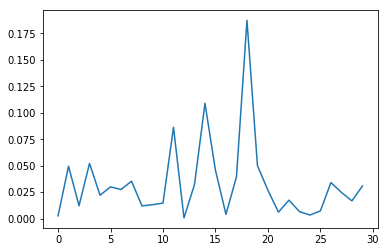

1: level, stress, vowel, syllable, model, mapping, representation, heavy, phonology, pattern
2: network, function, unit, input, weight, output, learning, neural, hidden, layer
3: network, training, neural, rules, set, method, examples, system, algorithm, learning
4: network, learning, algorithm, unit, set, training, input, problem, neural, function
5: image, images, model, set, recognition, data, face, distance, method, object
6: learning, action, function, algorithm, policy, set, problem, model, system, states
7: circuit, input, network, output, chip, neuron, current, weight, neural, voltage
8: model, data, gaussian, distribution, function, parameter, network, method, set, bayesian
9: algorithm, function, problem, set, learning, number, tree, graph, result, data
10: model, movement, motor, control, system, trajectory, network, point, arm, forward
11: network, speech, recognition, speaker, word, training, system, neural, input, performance
12: network, neuron, neural, model, input, lea

In [2]:
# Load the data
nips_data = np.loadtxt('docword.nips.txt', skiprows=3, dtype=int)
X = np.zeros(shape=(1500, 12419))

# Prepare X
for row in nips_data:
    X[row[0]-1][row[1] -1] = row[2]

em = EM(n_clusters=30)
em.fit(X)

plt.plot(em.py)
plt.show()

words = [line.strip() for line in open('vocab.nips.txt')]

for j in range(30):
    print("{}: ".format(j+1) + ", ".join(list(np.array(words)[np.argsort(em.p[:,j])[::-1][0:10]])))
    
